#### AFML - GUDHI TDA library test

In [13]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import gudhi as gd
%matplotlib inline

from AFML_functions import read_XYZ, cut_out, plot_facet_2d, plot_facet_3d
from AFML_functions import read_AFM_XYZ, mean_shift, down_shift, plot_afm_2d, plot_afm_3d, unique_z, interpolate_downsample, smooth_terraces

In [4]:
# Order terraces
def order_z(point_cloud):
    # Extract the Z-values and their unique sorted order
    z_values = np.array(point_cloud)[:, 3]
    sorted_order = np.argsort(z_values)
    
    # Create a mapping from original Z-values to their order
    z_to_order_mapping = {z: i + 1 for i, z in enumerate(np.unique(z_values))}
    
    # Update the first column based on the order
    ordered_indices = [z_to_order_mapping[z] for z in z_values]
    ordered_point_cloud = np.array(point_cloud)
    ordered_point_cloud[:, 0] = ordered_indices

    # Sort the data first by the index (first column), and then by the Z-value (last column)
    sorted_point_cloud = ordered_point_cloud[ordered_point_cloud[:, 0].argsort(), :]
    return sorted_point_cloud 

In [5]:
data = np.load('PAR_cut_xyz_test.npy')
z = set(point[3] for point in data)
print(z)

{512.067, 516.217, 518.454, 522.605, 524.842, 503.442, 505.679, 509.83}


In [6]:
# Define the Z-values to be removed
z_remove = [516.217, 522.605, 503.442, 509.83]

# Create a mask to filter out points with the specified Z-values
mask = np.isin(data[:, 3], z_remove, invert=True)

# Apply the mask to keep points with Z-values not in the z_values_to_remove list
data_mod = data[mask]

data_mod = order_z(data_mod)
#print(np.shape(data_mod))
#print(data_mod)
#plot_facet_2d(data_mod)

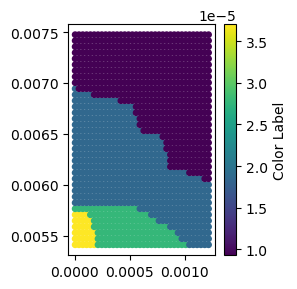

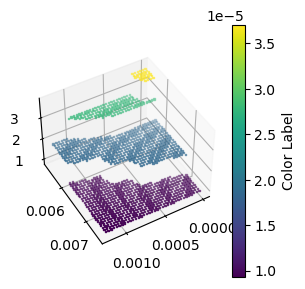

In [14]:
afm = read_AFM_XYZ('/Users/user/Documents/PhD/AFML/AFML/sample_preproc_data/terrace_sample/save-2011.11.30-14.25.48_terrace_200.xyz')
#afm = read_AFM_XYZ('/Users/user/Documents/PhD/AFML/AFML/sample_preproc_data/terrace_sample/save-2011.11.30-14.25.48_terrace_IDEAL.xyz')
rounded_afm = mean_shift(afm, bandwidth=0.00000475)
smooth_afm = smooth_terraces(rounded_afm, 0.1)
nearest_36 = interpolate_downsample(smooth_afm, 36, 'nearest')

plot_afm_2d(nearest_36)
plot_afm_3d(nearest_36)

In [16]:
point_cloud = nearest_36
# Extract each dimension into separate lists
x_values = [point[0] for point in point_cloud]
y_values = [point[1] for point in point_cloud]
z_values = [point[2] for point in point_cloud]

# Calculate maximum and minimum values for each dimension
max_x = max(x_values)
min_x = min(x_values)
max_y = max(y_values)
min_y = min(y_values)
max_z = max(z_values)
min_z = min(z_values)

# Print or use the calculated values as needed
print("Max X:", max_x)
print("Min X:", min_x)
print("Max Y:", max_y)
print("Min Y:", min_y)
print("Max Z:", max_z)
print("Min Z:", min_z)


Max X: 0.0012148134012777952
Min X: 3.109590900375666e-06
Max Y: 0.007474054010521392
Min Y: 0.005413117379197596
Max Z: 3.703497693922487e-05
Min Z: 9.290414944757932e-06


#### TDA test with Gudhi - VR and alpha complexes, persistence diagrams

In [17]:
skeleton01 = gd.RipsComplex(points = nearest_36, max_edge_length = 0.01)
skeleton1 = gd.RipsComplex(points = nearest_36, max_edge_length = 0.1)

In [18]:
Rips_simplex_tree_01_1d = skeleton01.create_simplex_tree(max_dimension=1)
Rips_simplex_tree_01_2d = skeleton01.create_simplex_tree(max_dimension=2)

In [19]:
Rips_simplex_tree_1_1d = skeleton1.create_simplex_tree(max_dimension=1)
Rips_simplex_tree_1_2d = skeleton1.create_simplex_tree(max_dimension=2)

In [12]:
#Rips_simplex_tree_2d.dimension()
#Rips_simplex_tree_2d.num_vertices()
#Rips_simplex_tree_01_2d.num_simplices()

362798136

Can compute persistence on the generated simplex tree

In [ ]:
#BarCodes_Rips0 = Rips_simplex_tree_2d.persistence()

#for i in range(10):
#    print(BarCodes_Rips0[i])